In [36]:
from pyspark.sql import functions as F
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
raw_merchant_fraud_df = pd.read_csv("../data/tables/merchant_fraud_probability.csv").sort_values('fraud_probability')
raw_merchant_fraud_df

,merchant_abn,order_datetime,fraud_probability
21,99989036621,2021-10-17,18.210891
37,67264251405,2021-10-19,18.210891
44,83199298021,2021-12-14,22.799803
34,83199298021,2022-01-04,23.920306
31,83199298021,2021-12-30,23.998597
...,...,...,...
6,23686790459,2021-12-10,79.454344
57,14530561097,2021-09-15,80.800545
65,97884414539,2021-10-19,89.799200
41,35575706403,2022-02-20,91.096068


In [38]:
merchant_detail = pd.read_csv('../data/curated/merchant_detail_with_income.csv')
merchant_detail['log_mean_transaction_amount']= np.log(merchant_detail['mean_transaction_amount'])
merchant_detail['log_transactions_number']= np.log(merchant_detail['total_transactions'])
merchant_fraud_df = raw_merchant_fraud_df.merge(merchant_detail, on = 'merchant_abn', how = 'inner')
merchant_fraud_df = merchant_fraud_df.groupby(['merchant_abn', 'merchant_name', 'Median_tot_prsnl_inc_weekly','mean_transaction_amount',\
                                               'log_mean_transaction_amount','log_transactions_number','total_transactions'],
                                              as_index=False).agg(mean_fraud_probability=('fraud_probability','mean'))

In [39]:
merchant_fraud_df

,merchant_abn,merchant_name,Median_tot_prsnl_inc_weekly,mean_transaction_amount,log_mean_transaction_amount,log_transactions_number,total_transactions,mean_fraud_probability
0,11470993597,Sed Associates,813,62.0,4.127134,5.921578,373,63.377344
1,11590404675,Arcu Sed PC,662,15958.0,9.677716,3.806662,45,29.607818
2,14530561097,Duis At Inc.,744,11025.0,9.307921,5.105945,165,80.800545
3,15157368385,Tempus Non Lacinia Inc.,793,320.0,5.768321,4.691348,109,64.277413
4,18737319630,Ut Industries,773,202.0,5.308268,5.283204,197,72.730697
5,19492220327,Commodo Ipsum Industries,567,9932.0,9.203517,6.598509,734,31.958307
6,21439773999,Mauris Non Institute,654,78.0,4.356709,11.578001,106724,28.504479
7,22606727520,Laoreet Ipsum Industries,565,160.0,5.075174,6.182085,484,62.992787
8,23709946765,Faucibus Leo Corp.,522,7476.0,8.919453,5.135798,170,44.012725
9,27093785141,Placerat Orci Institute,662,377.0,5.932245,10.045595,23054,28.880648


<AxesSubplot:xlabel='Median_tot_prsnl_inc_weekly', ylabel='mean_fraud_probability'>

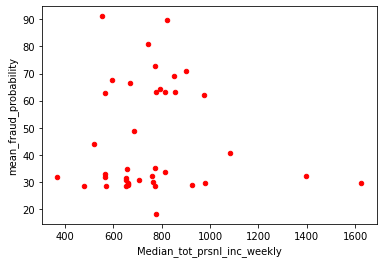

In [40]:
merchant_fraud_df.plot.scatter(x = 'Median_tot_prsnl_inc_weekly', y = 'mean_fraud_probability',  c = 'red')

<AxesSubplot:xlabel='mean_transaction_amount', ylabel='mean_fraud_probability'>

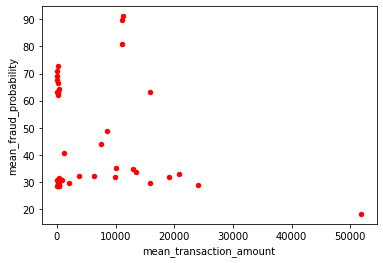

In [41]:
merchant_fraud_df.plot.scatter(x = 'mean_transaction_amount', y = 'mean_fraud_probability',  c = 'red')

<AxesSubplot:xlabel='total_transactions', ylabel='mean_fraud_probability'>

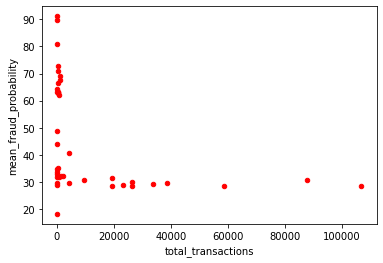

In [42]:
merchant_fraud_df.plot.scatter(x = 'total_transactions', y = 'mean_fraud_probability',  c = 'red')

Need take log transformation for the mean transaction amount and the number of transactions.

<AxesSubplot:xlabel='log_mean_transaction_amount', ylabel='mean_fraud_probability'>

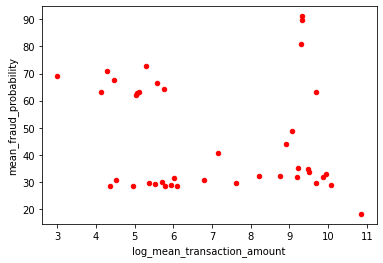

In [43]:
merchant_fraud_df.plot.scatter(x = 'log_mean_transaction_amount', y = 'mean_fraud_probability',  c = 'red')

<AxesSubplot:xlabel='log_transactions_number', ylabel='mean_fraud_probability'>

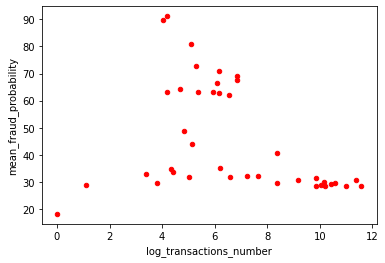

In [44]:
merchant_fraud_df.plot.scatter(x = 'log_transactions_number', y = 'mean_fraud_probability',  c = 'red')

In [45]:
from statsmodels.formula.api import ols, glm
from sklearn import linear_model

In [46]:
fitter = ols(
    formula="mean_fraud_probability ~ log_transactions_number + log_mean_transaction_amount + Median_tot_prsnl_inc_weekly",
    data=merchant_fraud_df
).fit()

print(fitter.summary())

                              OLS Regression Results                              
Dep. Variable:     mean_fraud_probability   R-squared:                       0.379
Model:                                OLS   Adj. R-squared:                  0.327
Method:                     Least Squares   F-statistic:                     7.312
Date:                    Mon, 03 Oct 2022   Prob (F-statistic):           0.000597
Time:                            12:35:05   Log-Likelihood:                -166.60
No. Observations:                      40   AIC:                             341.2
Df Residuals:                          36   BIC:                             348.0
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

It seems that the personal income of the consumer is not significant.

In [47]:
fitter = ols(
    formula="mean_fraud_probability ~ log_transactions_number + log_mean_transaction_amount",
    data=merchant_fraud_df
).fit()

print(fitter.summary())

                              OLS Regression Results                              
Dep. Variable:     mean_fraud_probability   R-squared:                       0.378
Model:                                OLS   Adj. R-squared:                  0.344
Method:                     Least Squares   F-statistic:                     11.24
Date:                    Mon, 03 Oct 2022   Prob (F-statistic):           0.000153
Time:                            12:35:06   Log-Likelihood:                -166.62
No. Observations:                      40   AIC:                             339.2
Df Residuals:                          37   BIC:                             344.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

The reduced model is better with a lower AIC.

In [48]:
merchant_detail = pd.read_csv('../data/curated/merchant_detail.csv')
merchant_detail['log_mean_transaction_amount']= np.log(merchant_detail['mean_transaction_amount'])
merchant_detail['log_transactions_number']= np.log(merchant_detail['total_transactions'])
merchant_fraud_df = raw_merchant_fraud_df.merge(merchant_detail, on = 'merchant_abn', how = 'inner')
merchant_fraud_df = merchant_fraud_df.groupby(['merchant_abn', 'merchant_name','mean_transaction_amount',\
                                               'log_mean_transaction_amount','log_transactions_number','total_transactions'],
                                              as_index=False).agg(mean_fraud_probability=('fraud_probability','mean'))

In [49]:
X_train = merchant_fraud_df[['log_transactions_number', 'log_mean_transaction_amount']]
Y_train = merchant_fraud_df[['mean_fraud_probability']]

In [50]:
merchant_test = pd.merge(merchant_detail, merchant_fraud_df, on = 'merchant_abn', indicator=True, how='outer')\
         .query('_merge=="left_only"')\
         .drop('_merge', axis=1)[['merchant_abn', 'merchant_name_x', 'log_transactions_number_x', 'log_mean_transaction_amount_x']]\
         .rename(columns={'merchant_name_x': 'merchant_name', 'log_transactions_number_x': 'log_transactions_number', 'log_mean_transaction_amount_x':'log_mean_transaction_amount'})

In [51]:
merchant_test

,merchant_abn,merchant_name,log_transactions_number,log_mean_transaction_amount
2,32361057556,Orci In Consequat Corporation,11.236553,4.700480
3,86578477987,Leo In Consulting,12.393945,3.555348
4,38700038932,Etiam Bibendum Industries,8.754792,7.198931
5,45629217853,Lacus Consulting,12.215181,3.610918
8,63123845164,Odio Phasellus Institute,9.217812,6.621406
...,...,...,...,...
3950,45504841435,Donec Vitae Company,4.682131,4.897840
3951,80597774208,Arcu Iaculis Enim Institute,5.135798,4.382027
3952,29166700531,Ac Eleifend PC,1.791759,7.280697
3953,61968317984,Ante Ipsum Ltd,4.465908,5.594711


In [52]:
X_test = merchant_test[['log_transactions_number', 'log_mean_transaction_amount']]

In [53]:
len(merchant_detail), len(merchant_fraud_df), len(merchant_test)

(3955, 45, 3910)

In [54]:
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted_fraud_prob = regr.predict(X_test)

In [55]:
merchant_test['mean_fraud_probability'] = predicted_fraud_prob

In [56]:
merchant_test

,merchant_abn,merchant_name,log_transactions_number,log_mean_transaction_amount,mean_fraud_probability
2,32361057556,Orci In Consequat Corporation,11.236553,4.700480,28.107352
3,86578477987,Leo In Consulting,12.393945,3.555348,26.106311
4,38700038932,Etiam Bibendum Industries,8.754792,7.198931,32.140727
5,45629217853,Lacus Consulting,12.215181,3.610918,27.141809
8,63123845164,Odio Phasellus Institute,9.217812,6.621406,32.055305
...,...,...,...,...,...
3950,45504841435,Donec Vitae Company,4.682131,4.897840,77.093856
3951,80597774208,Arcu Iaculis Enim Institute,5.135798,4.382027,76.710452
3952,29166700531,Ac Eleifend PC,1.791759,7.280697,84.947045
3953,61968317984,Ante Ipsum Ltd,4.465908,5.594711,74.575535


In [57]:
fraud_detail = pd.concat([merchant_fraud_df, merchant_test], ignore_index=True, sort=False)\
[['merchant_abn','merchant_name','log_transactions_number','log_mean_transaction_amount', 'mean_fraud_probability']]\
.rename(columns={'mean_fraud_probability': 'fraud_probability'})[['merchant_name', 'fraud_probability']]

In [58]:
fraud_detail

,merchant_name,fraud_probability
0,Et Arcu Limited,53.286933
1,Sed Associates,63.377344
2,Arcu Sed PC,29.607818
3,Duis At Inc.,80.800545
4,Odio Incorporated,36.985371
...,...,...
3950,Donec Vitae Company,77.093856
3951,Arcu Iaculis Enim Institute,76.710452
3952,Ac Eleifend PC,84.947045
3953,Ante Ipsum Ltd,74.575535


In [59]:
merchant_detail = merchant_detail.merge(fraud_detail, on = 'merchant_name', how = 'inner')

In [60]:
merchant_detail.to_csv('../data/curated/merchant_detail_with_fraud_prob.csv', index = False)